Exercise 6

4.1 Plot the potential of the harmonic oscillator
with some different values for the force constant k.

In [754]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import builtins

In [755]:
# constants
kT = 0.15
k_B = 1
x_extrema = 100
x0 = 0 # positional displacement
x_min, x_max = -x_extrema, x_extrema  
x = np.linspace(x_min, x_max, 4000)  
spring_constants = [0.5, 1, 2]
kTs = [0.05, 0.15, 0.3]



Define functions, V and P

In [756]:
# Potential energy function, V(x)
def V(x, k, x0):
    return 0.5 * k * (x-x0)**2

# Probability distribution function, P(x)
def P(x, k, x0):
    # inplicitely set kT = whatever the global variable kT is
    return np.sqrt(k / (2 * np.pi * kT)) * np.exp(-0.5 * (k * (x-x0)**2) / (kT))  # prob density


Plots

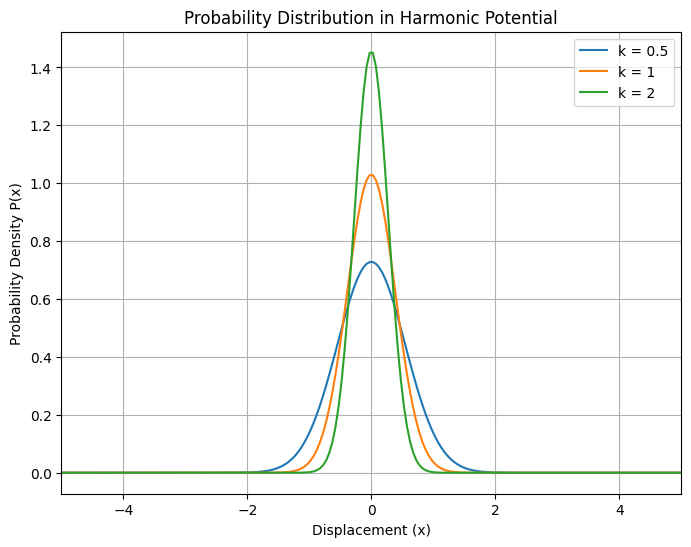

In [757]:
plt.figure(figsize=(8, 6))
for k in spring_constants:
    plt.plot(x, P(x, k, x0), label=f'k = {k}')

plt.xlabel('Displacement (x)')
plt.ylabel('Probability Density P(x)')
plt.title('Probability Distribution in Harmonic Potential')
plt.xlim(-5,5)
plt.grid(True)
plt.legend()
plt.savefig('classical_prob_dist_multiple_k.png')
plt.show()


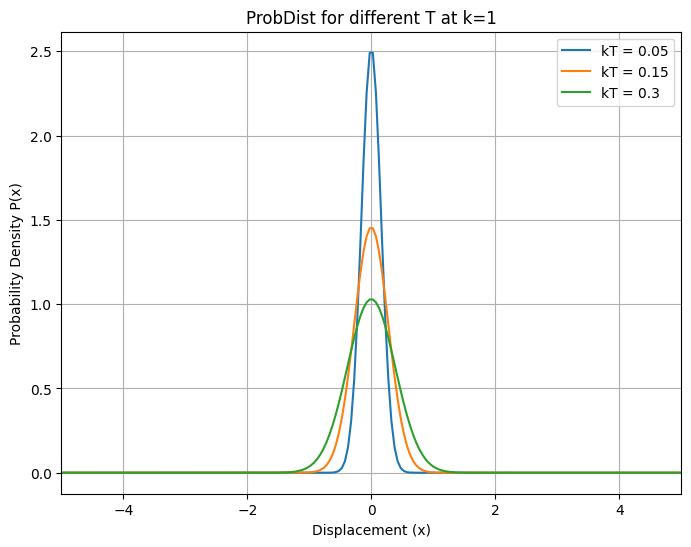

In [758]:
plt.figure(figsize=(8, 6))
for kT in kTs:
    plt.plot(x, P(x, k, x0), label=f'kT = {kT}')

plt.xlabel('Displacement (x)')
plt.ylabel('Probability Density P(x)')
plt.title('ProbDist for different T at k=1')
plt.xlim((-5, 5))
plt.grid(True)
plt.legend()
plt.savefig('classical_prob_dist_multiple_k.png')
plt.show()

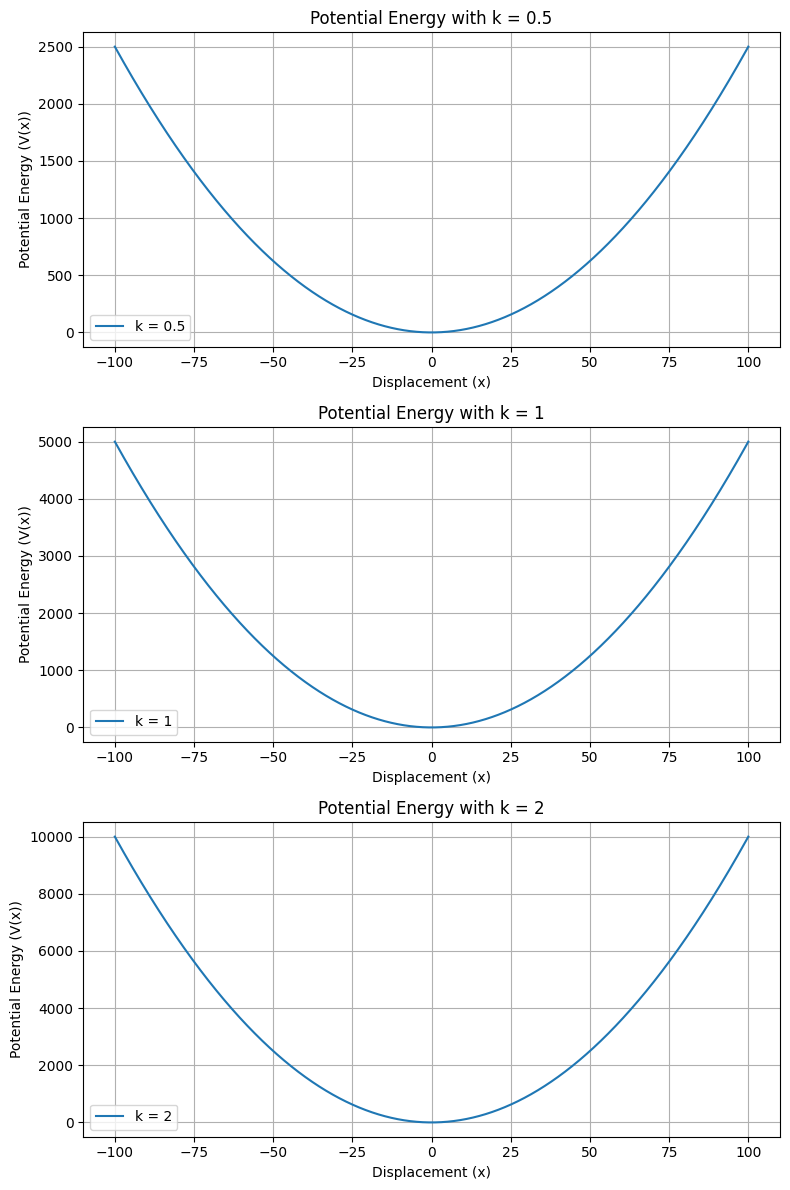

In [759]:
# Plot potential energies for different spring constants
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i, k in enumerate(spring_constants):
    V_values = V(x, k, 0)
    axs[i].plot(x, V_values, label=f'k = {k}')
    axs[i].set_title(f'Potential Energy with k = {k}')
    axs[i].set_xlabel('Displacement (x)')
    axs[i].set_ylabel('Potential Energy (V(x))')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.savefig('HO_pot.png')
plt.show()


In [760]:
# integrand for thermally averaged potential energy
def integrand(x):
    return V(x,k, x0) * P(x,k,x0)

# perform int
thermal_avg_V, _ = quad(integrand, x_min, x_max)

print(f"Thermally averaged potential energy at k={k}: {thermal_avg_V} J")

Thermally averaged potential energy at k=2: 0.15 J


4.2 Direct Monte Carlo sampling
Evaluate the thermally avg pot energy by MC sampling.
Use a constant probability dist in a finite range as a known dist.

In [761]:
def direct_sampling(k,x_min,x_max,N=100000):
    xs = np.linspace(x_min, x_max, N)
    envelope = lambda x: np.exp(-0.5*k*(x-x0)**2/kT)
    sample = [x for x in xs if np.random.rand() < envelope(x)]
    print('sample size:', len(sample))
    rejection_rate = 1 - len(sample) / len(xs)
    print(f"Rejection Rate: {rejection_rate:.2%}")
    return np.array(sample)

In [762]:
def estimate_thermal_avg_V(accepted_samples, k):
    V_values = V(accepted_samples, k, x0)
    return np.mean(V_values)

In [763]:
num_samples = 1000000
k = 1
samples = direct_sampling(k,x_min,x_max,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)
print(f"Estimated thermally avg pot energy: {thermal_avg_V} J")

sample size: 6880
Rejection Rate: 99.31%
Estimated thermally avg pot energy: 0.1505619516063108 J


4.3 Heat cap of one harmonic osc by eval the thermally avg pot energy at some different temps and then taking the deriv numerically.

In [764]:
num_samples = 100000
samples = direct_sampling(k,x_min,x_max,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)

sample size: 716
Rejection Rate: 99.28%


In [765]:
def estimate_thermal_avg_V_sqrd(accepted_samples, k):
    V_values_sqrd = V(accepted_samples, k, x0)**2
    return np.mean(V_values_sqrd)

Exercise 7

5.1 Two oscillators
a) consider two classical harmonic oscillators with k=1, x0=0 and k=10, x0=1, respectively. Plot the potentials.

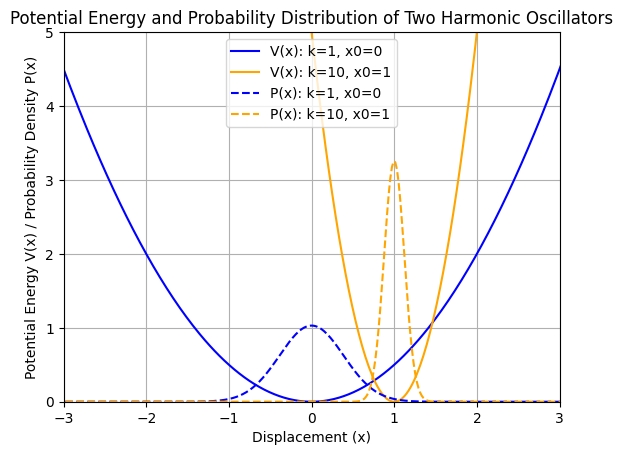

In [766]:
k_1 = 1
x0_1 = 0
k_2 = 10
x0_2 = 1
kT = 0.15

x_extrema = 4
x_min, x_max = -x_extrema, x_extrema  
x = np.linspace(x_min, x_max, 400)  # Generate 400 points from x_min to x_max

V1 = V(x, k_1, x0_1)
V2 = V(x, k_2, x0_2)

P1 = P(x, k_1, x0_1)
P2 = P(x, k_2, x0_2)

# Plot potential energy functions
plt.plot(x, V1, label=f'V(x): k={k_1}, x0={x0_1}', color='blue')
plt.plot(x, V2, label=f'V(x): k={k_2}, x0={x0_2}', color='orange')

# Plot probability distribution functions on the same graph
plt.plot(x, P1, label=f'P(x): k={k_1}, x0={x0_1}', color='blue', linestyle='dashed')
plt.plot(x, P2, label=f'P(x): k={k_2}, x0={x0_2}', color='orange', linestyle='dashed')

plt.xlabel('Displacement (x)')
plt.ylabel('Potential Energy V(x) / Probability Density P(x)')
plt.title('Potential Energy and Probability Distribution of Two Harmonic Oscillators')
plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.grid(True)
plt.legend()
plt.savefig('harmonic_oscillators_with_prob.png')
plt.show()

b) Oscillators are in contact with heat bath with kT = 0.15 I think this is already the case for the above :)   
Evaluate the thermal avg potential energy for th both oscillators using direct MC sampling.

In [767]:
minmax = 1
samples = direct_sampling(k,-minmax,minmax,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)
print(f"Estimated thermally avg pot energy: {thermal_avg_V} J")

sample size: 48041
Rejection Rate: 51.96%
Estimated thermally avg pot energy: 0.0693755409372579 J


Exercise 8: Metropolis Monte Carlo

6.2 Random walk transitions I

C:\Users\jacob\AppData\Local\Temp\ipykernel_1804\2880833370.py:59: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")


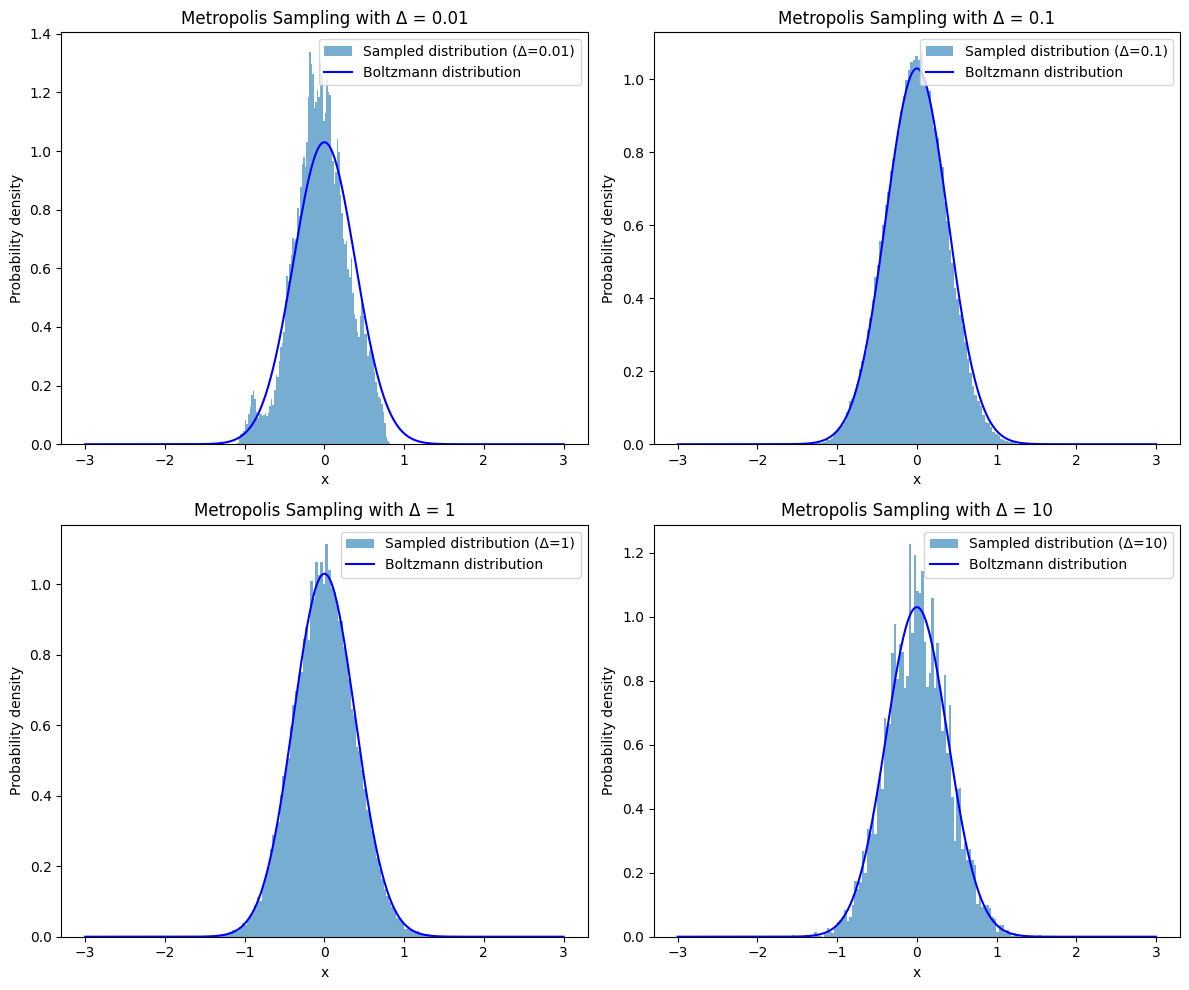

In [788]:
import numpy as np
import matplotlib.pyplot as plt
import builtins

k = 1  # Spring constant
kT = 0.15  # Temperature factor

# Boltzmann distribution function based on the harmonic potential
def V(x, k, x0):
    return 0.5 * k * (x - x0)**2

def P(x, k, x0):
    return np.exp(-V(x, k, x0) / kT)

# Metropolis sampling function
def metropolis_sampling(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + delta * N(0,1)
        RNDn = np.random.randn()
        proposed_x = current_x + Delta * RNDn

        # Acceptance probability (min(1, P(x') / P(x)))
        acceptance_prob = min(1, P(proposed_x, k, x0) / P(current_x, k, x0))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)

# Initial position
x0 = 0.0
N = 100000  # Number of samples

Delta_values = [0.01, 0.1, 1, 10]

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()

# Linspace for plotting the Boltzmann distribution
xs = np.linspace(-3, 3, 400)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, Delta in enumerate(Delta_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=100, density=True, label=f"Sampled distribution (Δ={Delta})", alpha=0.6)
    axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with Δ = {Delta}')
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()
